# custom scorecard

In [ ]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

import warnings

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import scorecardpy as sc
import pprint

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("merged_applicant_and_bureau_cleaned_2.csv")
# df


In [ ]:
df = df[[
    "TARGET",
    "AMT_CREDIT",
    'YEARS_EMPLOYED',
    "DEBT_RATIO",
    'AMT_CREDIT_SUM_DEBT_sum',
    'AGE',
    "CREDIT_ACTIVE_Active",
    "OCCUPATION_TYPE",
    'NAME_INCOME_TYPE',
    "NAME_FAMILY_STATUS",

    # "DEBT_RATIO",
    # "AMT_ANNUITY",
    # "NAME_INCOME_TYPE",
    # "AMT_CREDIT",
    # "AGE",
    # "OCCUPATION_TYPE",
    # "AMT_CREDIT_SUM_DEBT_sum",
    # "YEARS_EMPLOYED"
]]
# df

In [ ]:
df.isnull().sum()


TARGET                         0
AMT_CREDIT                     0
YEARS_EMPLOYED             47945
DEBT_RATIO                 98302
AMT_CREDIT_SUM_DEBT_sum    98302
AGE                            0
CREDIT_ACTIVE_Active       98302
OCCUPATION_TYPE            81149
NAME_INCOME_TYPE               0
NAME_FAMILY_STATUS             0
dtype: int64

In [ ]:
# Fill numeric columns with 0
df['DEBT_RATIO'] = df['DEBT_RATIO'].fillna(0)
# df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(0)
df['AMT_CREDIT_SUM_DEBT_sum'] = df['AMT_CREDIT_SUM_DEBT_sum'].fillna(0)
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].fillna(0)
df['CREDIT_ACTIVE_Active'] = df['CREDIT_ACTIVE_Active'].fillna(0)


# Fill OCCUPATION_TYPE with 'MISSING'
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('MISSING')

# Verify no missing values remain
print(df.isnull().sum())

TARGET                     0
AMT_CREDIT                 0
YEARS_EMPLOYED             0
DEBT_RATIO                 0
AMT_CREDIT_SUM_DEBT_sum    0
AGE                        0
CREDIT_ACTIVE_Active       0
OCCUPATION_TYPE            0
NAME_INCOME_TYPE           0
NAME_FAMILY_STATUS         0
dtype: int64


In [ ]:
train, test = sc.split_df(df, y = 'TARGET', ratio = .7).values()
print(train.shape)
print(test.shape)

(178050, 10)
(76308, 10)


In [ ]:
custom_breaks = {
    'AMT_CREDIT': [0, 150000, 270000, 670000, 1000000, 1300000, 4000000],
    'YEARS_EMPLOYED': [0, 4.0, 9, 15, 50],
    'DEBT_RATIO': [-np.inf, 0.055, 0.352, 1426.867],
    'AMT_CREDIT_SUM_DEBT_sum': [0, 8000, 55000, 65000, 90000],
    'AGE': [30, 40, 50, 60, 70],
    "CREDIT_ACTIVE_Active": [0, 1, 2, 12.0],
    'OCCUPATION_TYPE': ["Accountants", "Core staff", "Drivers", "High skill tech staff", "Laborers", "Managers", "Medicine staff", "OTHER", "Sales staff", "Security staff"],
    'NAME_INCOME_TYPE': ["Businessman", "Commercial associate", "Pensioner", "State servant", "Student", "Working"],
    "NAME_FAMILY_STATUS": ['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Widow']


    # 'DEBT_RATIO': [-np.inf, 0.055, 0.352, 1426.867],
    # 'AMT_ANNUITY': [1615.5, 14823.0, 21888.0, 27909.0, 37102.5, 225000.0],
    # 'NAME_INCOME_TYPE': ["Businessman", "Commercial associate", "Pensioner", "State servant", "Student", "Working"],
    # 'AMT_CREDIT': [0, 150000, 270000, 670000, 1000000, 1300000, 4000000],
    # 'AGE': [30, 40, 50, 60, 70],
    # 'OCCUPATION_TYPE': ["Accountants", "Core staff", "Drivers", "High skill tech staff", "Laborers", "Managers", "Medicine staff", "OTHER", "Sales staff", "Security staff"],
    # 'AMT_CREDIT_SUM_DEBT_sum': [0, 8000, 55000, 65000, 90000],
    # 'YEARS_EMPLOYED': [0, 4.0, 9, 15, 50],
    # "CREDIT_ACTIVE_Active": [0, 1, 2, 12.0]
}

# Step 4: Apply `woebin` with custom bins (force custom binning)
bins = sc.woebin(train, y='TARGET', breaks_list=custom_breaks)

# Step 5: Display the results for verification
for variable, bin_details in bins.items():
    print(variable, " : ")
    display(bin_details)  # Use display() in Jupyter notebooks or print if you're running in a script
    print("--" * 50)

[INFO] creating woe binning ...


/opt/anaconda3/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/opt/anaconda3/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/opt/anaconda3/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensur

NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,Businessman,4,0.000022,4,0,0.000000,1.004417,0.000042,0.04844,Businessman,False
1,NAME_INCOME_TYPE,Commercial associate,40595,0.227998,37771,2824,0.069565,-0.097316,0.002072,0.04844,Commercial associate,False
2,NAME_INCOME_TYPE,Pensioner,33585,0.188627,31707,1878,0.055918,-0.330258,0.017905,0.04844,Pensioner,False
3,NAME_INCOME_TYPE,State servant,12838,0.072103,12161,677,0.052734,-0.392246,0.009409,0.04844,State servant,False
4,NAME_INCOME_TYPE,Student,8,0.000045,8,0,0.000000,0.311270,0.000006,0.04844,Student,False
5,NAME_INCOME_TYPE,Working,91003,0.511109,82836,8167,0.089744,0.179311,0.017733,0.04844,Working,False
6,NAME_INCOME_TYPE,missing,17,0.000095,9,8,0.470588,2.378289,0.001273,0.04844,missing,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,Civil marriage,16857,0.094676,15251,1606,0.095272,0.245240,0.006319,0.014703,Civil marriage,False
1,NAME_FAMILY_STATUS,Married,118534,0.665734,110013,8521,0.071887,-0.061927,0.002487,0.014703,Married,False
2,NAME_FAMILY_STATUS,Separated,12646,0.071025,11633,1013,0.080104,0.055208,0.000222,0.014703,Separated,False
3,NAME_FAMILY_STATUS,Single / not married,20494,0.115102,18676,1818,0.088709,0.166636,0.003430,0.014703,Single / not married,False
4,NAME_FAMILY_STATUS,Widow,9517,0.053451,8921,596,0.062625,-0.209785,0.002153,0.014703,Widow,False
5,NAME_FAMILY_STATUS,missing,2,0.000011,2,0,0.000000,1.697630,0.000092,0.014703,missing,False


----------------------------------------------------------------------------------------------------
AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AGE,"[-inf,40.0)",57726,0.324212,52184,5542,0.096005,0.253784,2.325863e-02,0.050166,40.0,False
1,AGE,"[40.0,50.0)",53441,0.300146,49379,4062,0.076009,-0.001645,8.118559e-07,0.050166,50.0,False
2,AGE,"[50.0,60.0)",47659,0.267672,44714,2945,0.061793,-0.223973,1.221667e-02,0.050166,60.0,False
3,AGE,"[60.0,70.0)",19224,0.107970,18219,1005,0.052278,-0.401273,1.469006e-02,0.050166,70.0,False


----------------------------------------------------------------------------------------------------
YEARS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_EMPLOYED,"[-inf,4.0)",91859,0.515917,83966,7893,0.085925,0.131769,0.009473,0.042417,4.0,False
1,YEARS_EMPLOYED,"[4.0,9.0)",45229,0.254024,41735,3494,0.077251,0.015912,0.000065,0.042417,9.0,False
2,YEARS_EMPLOYED,"[9.0,15.0)",24714,0.138804,23278,1436,0.058105,-0.289443,0.010294,0.042417,15.0,False
3,YEARS_EMPLOYED,"[15.0,50.0)",16248,0.091255,15517,731,0.044990,-0.559073,0.022586,0.042417,50.0,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM_DEBT_sum  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM_DEBT_sum,"[-inf,8000.0)",156394,0.878371,145323,11071,0.070789,-0.078425,0.005226,0.040026,8000.0,False
1,AMT_CREDIT_SUM_DEBT_sum,"[8000.0,55000.0)",14797,0.083106,13275,1522,0.102859,0.330347,0.010436,0.040026,55000.0,False
2,AMT_CREDIT_SUM_DEBT_sum,"[55000.0,65000.0)",2617,0.014698,2285,332,0.126863,0.567218,0.006015,0.040026,65000.0,False
3,AMT_CREDIT_SUM_DEBT_sum,"[65000.0,90000.0)",2405,0.013507,2060,345,0.143451,0.709288,0.009172,0.040026,90000.0,False
4,AMT_CREDIT_SUM_DEBT_sum,"[90000.0,inf)",1837,0.010317,1553,284,0.154600,0.797235,0.009178,0.040026,inf,False


----------------------------------------------------------------------------------------------------
CREDIT_ACTIVE_Active  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CREDIT_ACTIVE_Active,"[-inf,1.0)",129838,0.729222,120666,9172,0.070642,-0.080733,0.004593,0.020714,1.0,False
1,CREDIT_ACTIVE_Active,"[1.0,2.0)",34428,0.193361,31538,2890,0.083943,0.106201,0.002281,0.020714,2.0,False
2,CREDIT_ACTIVE_Active,"[2.0,12.0)",13783,0.077411,12291,1492,0.108249,0.387388,0.013695,0.020714,12.0,False
3,CREDIT_ACTIVE_Active,"[12.0,inf)",1,0.000006,1,0,0.000000,2.390778,0.000144,0.020714,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,150000.0)",9684,0.054389,9137,547,0.056485,-0.319500,0.004854,0.041857,150000.0,False
1,AMT_CREDIT,"[150000.0,270000.0)",25591,0.143729,23663,1928,0.075339,-0.011291,0.000018,0.041857,270000.0,False
2,AMT_CREDIT,"[270000.0,670000.0)",71467,0.401387,64976,6491,0.090825,0.192537,0.016147,0.041857,670000.0,False
3,AMT_CREDIT,"[670000.0,1000000.0)",39228,0.220320,36475,2753,0.070179,-0.087798,0.001636,0.041857,1000000.0,False
4,AMT_CREDIT,"[1000000.0,1300000.0)",19749,0.110918,18483,1266,0.064105,-0.184851,0.003505,0.041857,1300000.0,False
5,AMT_CREDIT,"[1300000.0,4000000.0)",12324,0.069217,11755,569,0.046170,-0.532015,0.015686,0.041857,4000000.0,False
6,AMT_CREDIT,"[4000000.0,inf)",7,0.000039,7,0,0.000000,0.444867,0.000011,0.041857,inf,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,Accountants,5704,0.032036,5442,262,0.045933,-0.537353,0.007390,0.062434,Accountants,False
1,OCCUPATION_TYPE,Core staff,14692,0.082516,13891,801,0.054519,-0.356931,0.009048,0.062434,Core staff,False
2,OCCUPATION_TYPE,Drivers,11202,0.062915,9998,1204,0.107481,0.379469,0.010644,0.062434,Drivers,False
3,OCCUPATION_TYPE,High skill tech staff,6491,0.036456,6101,390,0.060083,-0.253857,0.002111,0.062434,High skill tech staff,False
4,OCCUPATION_TYPE,Laborers,31734,0.178231,28584,3150,0.099263,0.290760,0.017049,0.062434,Laborers,False
5,OCCUPATION_TYPE,Managers,13427,0.075411,12621,806,0.060028,-0.254829,0.004398,0.062434,Managers,False
6,OCCUPATION_TYPE,Medicine staff,5167,0.029020,4846,321,0.062125,-0.218263,0.001261,0.062434,Medicine staff,False
7,OCCUPATION_TYPE,Sales staff,17143,0.096282,15639,1504,0.087733,0.154565,0.002456,0.062434,Sales staff,False
8,OCCUPATION_TYPE,Security staff,4245,0.023842,3802,443,0.104358,0.346492,0.003316,0.062434,Security staff,False
9,OCCUPATION_TYPE,missing,68245,0.383291,63572,4673,0.068474,-0.114167,0.004760,0.062434,missing,False


----------------------------------------------------------------------------------------------------
DEBT_RATIO  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEBT_RATIO,"[-inf,0.055)",156188,0.877214,145157,11031,0.070626,-0.080902,0.005548,0.044208,0.055,False
1,DEBT_RATIO,"[0.055,0.352)",10917,0.061314,9898,1019,0.093341,0.222694,0.003342,0.044208,0.352,False
2,DEBT_RATIO,"[0.352,1426.867)",10945,0.061471,9441,1504,0.137414,0.659271,0.035317,0.044208,1426.867,False


----------------------------------------------------------------------------------------------------


In [ ]:
# sample code

# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,TARGET,NAME_INCOME_TYPE_woe,NAME_FAMILY_STATUS_woe,AGE_woe,YEARS_EMPLOYED_woe,AMT_CREDIT_SUM_DEBT_sum_woe,CREDIT_ACTIVE_Active_woe,AMT_CREDIT_woe,OCCUPATION_TYPE_woe,DEBT_RATIO_woe
0,0,-0.392246,-0.061927,-0.001645,0.131769,-0.078425,-0.080733,-0.184851,-0.356931,-0.080902
1,0,0.179311,0.166636,-0.223973,0.131769,-0.078425,-0.080733,-0.319500,0.290760,-0.080902
3,0,0.179311,0.166636,-0.223973,0.015912,-0.078425,-0.080733,0.192537,-0.356931,-0.080902
5,0,-0.097316,-0.061927,0.253784,0.015912,-0.078425,-0.080733,-0.532015,-0.537353,-0.080902
6,0,-0.392246,-0.061927,-0.223973,0.131769,-0.078425,-0.080733,-0.532015,-0.254829,-0.080902
...,...,...,...,...,...,...,...,...,...,...
254350,0,-0.097316,-0.061927,0.253784,0.131769,-0.078425,-0.080733,-0.011291,NaN,-0.080902
254352,0,-0.097316,0.166636,0.253784,0.131769,-0.078425,-0.080733,0.192537,-0.356931,-0.080902
254353,0,0.179311,0.055208,-0.001645,NaN,-0.078425,-0.080733,0.192537,0.154565,-0.080902
254354,0,-0.330258,-0.209785,-0.223973,0.131769,-0.078425,-0.080733,-0.011291,NaN,-0.080902


In [ ]:
y_train = train_woe.loc[:, 'TARGET']
X_train = train_woe.loc[:, train_woe.columns != 'TARGET']
y_test = test_woe.loc[:, 'TARGET']
X_test = test_woe.loc[:, train_woe.columns != 'TARGET']

#THIS NOT THE RIGHT THING TO DO I THINK 
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# create a logistic regression model object
lr = linear_model.LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
pd.Series(np.concatenate([lr.intercept_, lr.coef_[0]]),
          index = np.concatenate([['intercept'], lr.feature_names_in_]) )

intercept                     -0.151518
NAME_INCOME_TYPE_woe           0.723963
NAME_FAMILY_STATUS_woe         0.665579
AGE_woe                        0.767851
YEARS_EMPLOYED_woe             1.217266
AMT_CREDIT_SUM_DEBT_sum_woe    1.000978
CREDIT_ACTIVE_Active_woe       0.294686
AMT_CREDIT_woe                 0.767314
OCCUPATION_TYPE_woe            0.809341
DEBT_RATIO_woe                -0.754493
dtype: float64

In [ ]:
# sample code

# generate a card from the model and bins. The scores will be based on probability of default from the model
# bins = bins created from sc.woebin
# lr = fitted logistic regression model
# align target odds with probabity of default = 7.6% 
# odds = p/(1-p) = 0.076/(1-0.076) = 0.0825 ~= 1/12
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/12, pdo = 20, basepoints_eq0 = True)

pprint.pprint(card)

{'AGE':    variable          bin  points
13      AGE  [-inf,40.0)    52.0
14      AGE  [40.0,50.0)    58.0
15      AGE  [50.0,60.0)    63.0
16      AGE  [60.0,70.0)    67.0,
 'AMT_CREDIT':       variable                    bin  points
30  AMT_CREDIT        [-inf,150000.0)    65.0
31  AMT_CREDIT    [150000.0,270000.0)    58.0
32  AMT_CREDIT    [270000.0,670000.0)    53.0
33  AMT_CREDIT   [670000.0,1000000.0)    60.0
34  AMT_CREDIT  [1000000.0,1300000.0)    62.0
35  AMT_CREDIT  [1300000.0,4000000.0)    69.0
36  AMT_CREDIT        [4000000.0,inf)    48.0,
 'AMT_CREDIT_SUM_DEBT_sum':                    variable                bin  points
21  AMT_CREDIT_SUM_DEBT_sum      [-inf,8000.0)    60.0
22  AMT_CREDIT_SUM_DEBT_sum   [8000.0,55000.0)    48.0
23  AMT_CREDIT_SUM_DEBT_sum  [55000.0,65000.0)    41.0
24  AMT_CREDIT_SUM_DEBT_sum  [65000.0,90000.0)    37.0
25  AMT_CREDIT_SUM_DEBT_sum      [90000.0,inf)    35.0,
 'CREDIT_ACTIVE_Active':                 variable         bin  points
26  CREDIT_AC

In [ ]:
# sample code

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

# sample code

# check model performance at 1:5 odds of default
cutoff = 500

# create sets of predicted bad to compare with actual bad
predicted_bad_train = (train_score < cutoff)
predicted_bad_train_list = predicted_bad_train.astype(int).values.flatten().tolist()
predicted_bad_test = (test_score < cutoff)
predicted_bad_test_list = predicted_bad_test.astype(int).values.flatten().tolist()

print('*** Training Data Performance ***')
print('Confusion matrix:')
print(metrics.confusion_matrix(y_train, predicted_bad_train_list))
print('PCC measures:')
print(metrics.classification_report(y_train, predicted_bad_train_list))
 
print('*** Test Data Performance ***')
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, predicted_bad_test_list))
print('PCC measures:')
print(metrics.classification_report(y_test, predicted_bad_test_list))

*** Training Data Performance ***
Confusion matrix:
[[74554 89942]
 [ 5983  7571]]
PCC measures:
              precision    recall  f1-score   support

           0       0.93      0.45      0.61    164496
           1       0.08      0.56      0.14     13554

    accuracy                           0.46    178050
   macro avg       0.50      0.51      0.37    178050
weighted avg       0.86      0.46      0.57    178050

*** Test Data Performance ***
Confusion matrix:
[[31955 38544]
 [ 2513  3296]]
PCC measures:
              precision    recall  f1-score   support

           0       0.93      0.45      0.61     70499
           1       0.08      0.57      0.14      5809

    accuracy                           0.46     76308
   macro avg       0.50      0.51      0.37     76308
weighted avg       0.86      0.46      0.57     76308



In [ ]:
train_decision = -train_score['score']
test_decision  = -test_score['score']

Train AUC: 0.527
Test  AUC: 0.532


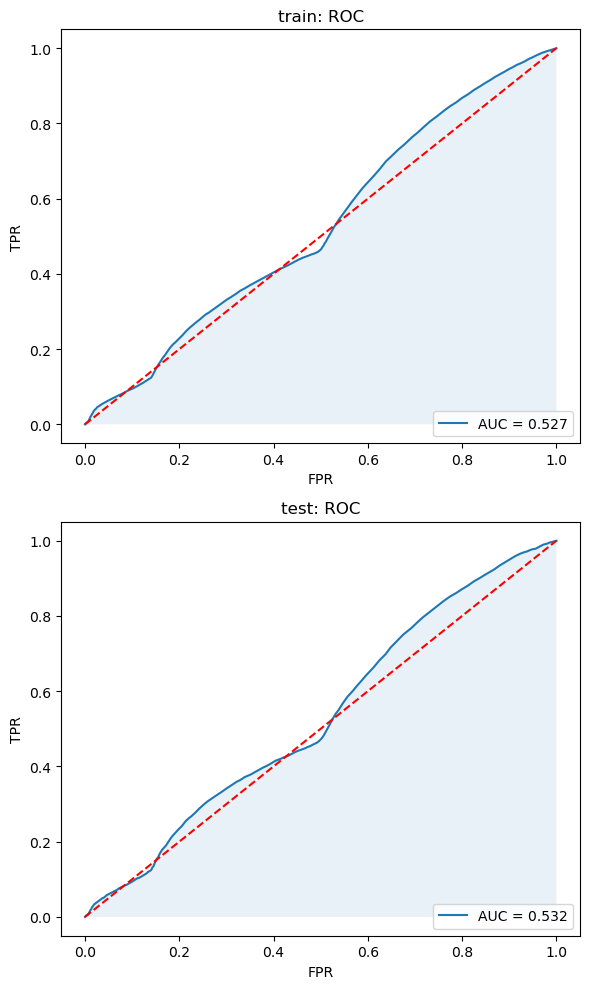

In [ ]:
train_decision = -train_score
test_decision  = -test_score

# --- Compute ROC and AUC for train ---
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, train_decision)
auc_train = metrics.roc_auc_score(y_train, train_decision)

# --- Compute ROC and AUC for test ---
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, test_decision)
auc_test = metrics.roc_auc_score(y_test, test_decision)

print(f"Train AUC: {auc_train:.3f}")
print(f"Test  AUC: {auc_test:.3f}")

# --- Plot ROC curves (train + test) ---
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Train ROC
axes[0].plot(fpr_train, tpr_train, label=f"AUC = {auc_train:.3f}")
axes[0].plot([0, 1], [0, 1], 'r--')  # random baseline
axes[0].set_title("train: ROC")
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR")
axes[0].fill_between(fpr_train, tpr_train, alpha=0.1)
axes[0].legend(loc="lower right")

# Test ROC
axes[1].plot(fpr_test, tpr_test, label=f"AUC = {auc_test:.3f}")
axes[1].plot([0, 1], [0, 1], 'r--')  # random baseline
axes[1].set_title("test: ROC")
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TPR")
axes[1].fill_between(fpr_test, tpr_test, alpha=0.1)
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
card

{'basepoints':      variable  bin  points
 0  basepoints  NaN       0,
 'NAME_INCOME_TYPE':            variable                   bin  points
 0  NAME_INCOME_TYPE           Businessman    37.0
 1  NAME_INCOME_TYPE  Commercial associate    60.0
 2  NAME_INCOME_TYPE             Pensioner    65.0
 3  NAME_INCOME_TYPE         State servant    66.0
 4  NAME_INCOME_TYPE               Student    51.0
 5  NAME_INCOME_TYPE               Working    54.0
 6  NAME_INCOME_TYPE               missing     8.0,
 'NAME_FAMILY_STATUS':               variable                   bin  points
 7   NAME_FAMILY_STATUS        Civil marriage    53.0
 8   NAME_FAMILY_STATUS               Married    59.0
 9   NAME_FAMILY_STATUS             Separated    57.0
 10  NAME_FAMILY_STATUS  Single / not married    55.0
 11  NAME_FAMILY_STATUS                 Widow    62.0
 12  NAME_FAMILY_STATUS               missing    25.0,
 'AGE':    variable          bin  points
 13      AGE  [-inf,40.0)    52.0
 14      AGE  [40.0,50.0

In [ ]:
# combine all variable tables into one big dataframe
card_df = pd.concat(card.values(), ignore_index=True)

# show all rows (or set a big number)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

card_df

,variable,bin,points
0,basepoints,NaN,0.0
1,NAME_INCOME_TYPE,Businessman,37.0
2,NAME_INCOME_TYPE,Commercial associate,60.0
3,NAME_INCOME_TYPE,Pensioner,65.0
4,NAME_INCOME_TYPE,State servant,66.0
5,NAME_INCOME_TYPE,Student,51.0
6,NAME_INCOME_TYPE,Working,54.0
7,NAME_INCOME_TYPE,missing,8.0
8,NAME_FAMILY_STATUS,Civil marriage,53.0
9,NAME_FAMILY_STATUS,Married,59.0
